In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from PIL import Image
import random

In [2]:
train_csv = "DATASET/Training_set.csv"
test_csv  = "DATASET/Testing_set.csv"
train_dir = "DATASET/train"
test_dir  = "DATASET/test"

In [ ]:
train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)

print(train_df.head())
print(f"Total classes: {train_df['label'].nunique()}")

      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART
Total classes: 75


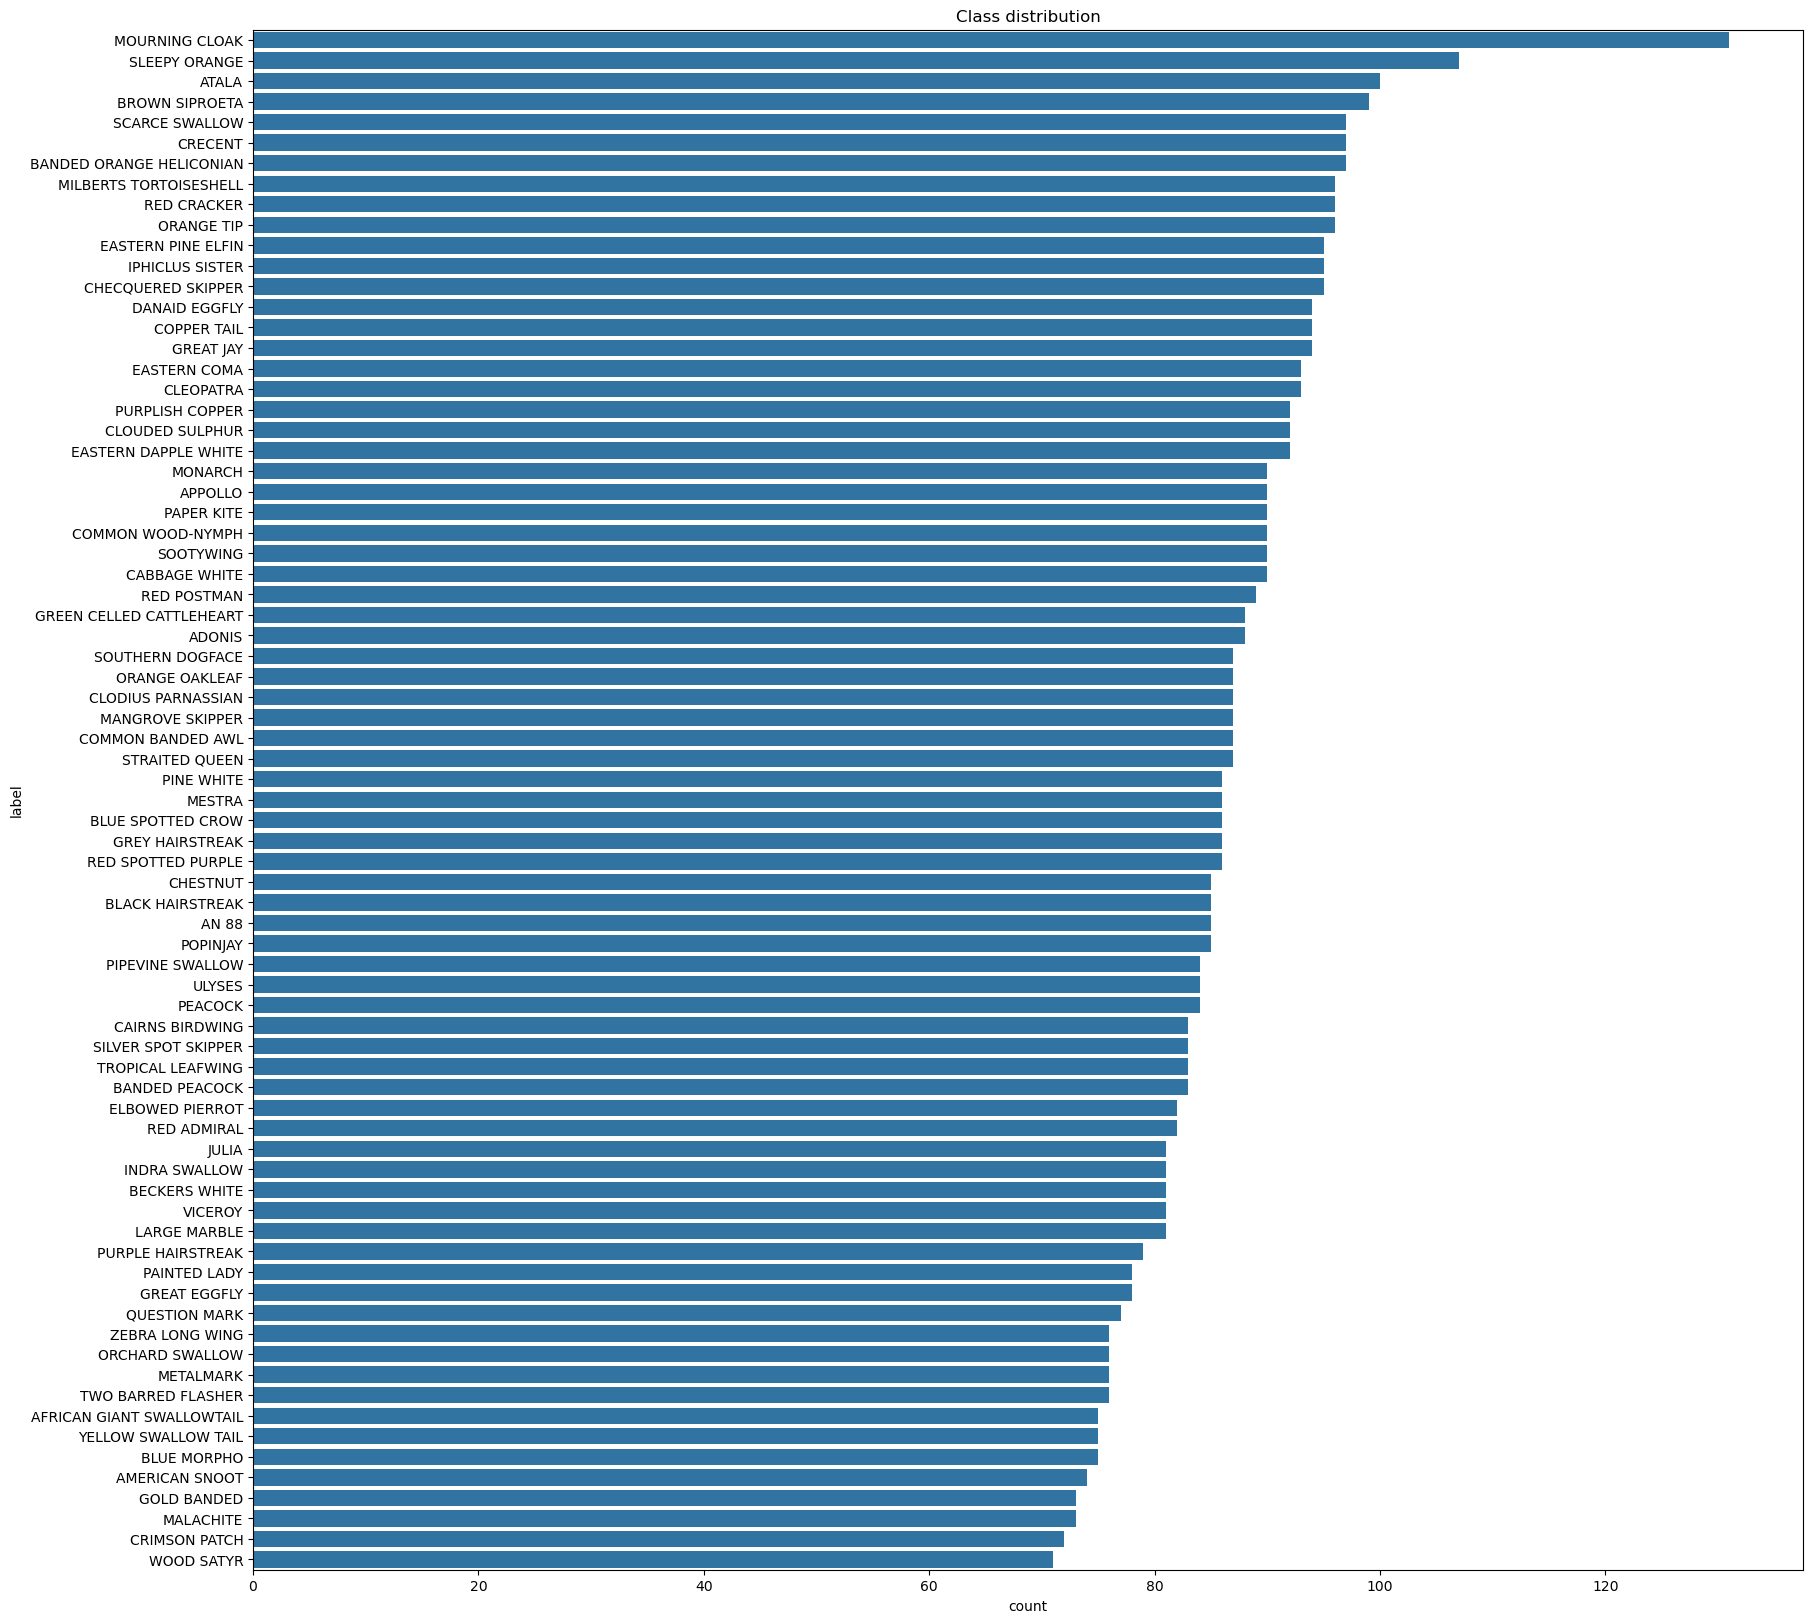

In [4]:
plt.figure(figsize=(20,20))
sns.countplot(y='label', data=train_df, order=train_df['label'].value_counts().index)
plt.title("Class distribution")
plt.show()


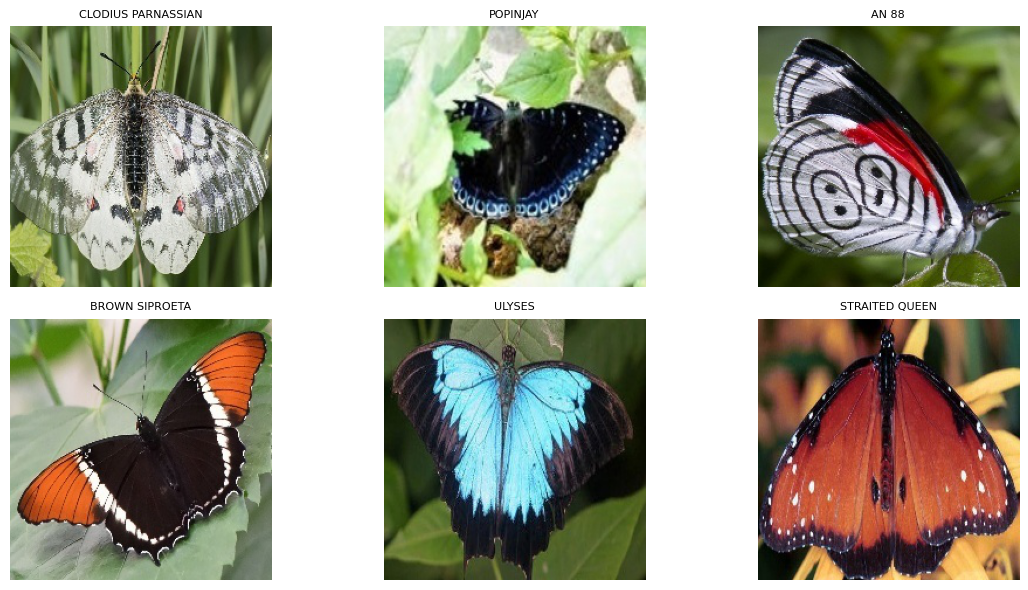

In [15]:
plt.figure(figsize=(12,6))
for i, idx in enumerate(random.sample(range(len(train_df)), 6)):
    img_path = os.path.join(train_dir, train_df['filename'][idx])
    label = train_df['label'][idx]
    plt.subplot(2,3,i+1)
    plt.imshow(Image.open(img_path))
    plt.title(label, fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
IMG_SIZE = (128,128)  

def load_images_and_labels(df, img_dir, target_size=IMG_SIZE):
    X, y = [], []
    for fname, label in zip(df['filename'], df['label']):
        path = os.path.join(img_dir, fname)
        img  = load_img(path, target_size=target_size)
        arr  = img_to_array(img)/255.0 
        X.append(arr)
        y.append(label)
    return np.array(X, dtype='float32'), np.array(y)

X, y = load_images_and_labels(train_df, train_dir)

In [7]:
le = LabelEncoder()
y_enc = le.fit_transform(y)
y_cat = to_categorical(y_enc)

print("Images shape:", X.shape)
print("Labels shape:", y_cat.shape)
print("Pixel range:", X.min(), "to", X.max())

Images shape: (6499, 128, 128, 3)
Labels shape: (6499, 75)
Pixel range: 0.0 to 1.0


In [19]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

In [ ]:
num_classes = train_df['label'].nunique()

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Conv2D(128,(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128,(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

c:\Users\JHANANISHRI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50, 
    callbacks=[lr]  
)

Epoch 1/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 508ms/step - accuracy: 0.0781 - loss: 3.8505 - val_accuracy: 0.1723 - val_loss: 3.4536 - learning_rate: 1.0000e-04
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 476ms/step - accuracy: 0.1039 - loss: 3.7283 - val_accuracy: 0.2046 - val_loss: 3.2697 - learning_rate: 1.0000e-04
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 487ms/step - accuracy: 0.1294 - loss: 3.5772 - val_accuracy: 0.2023 - val_loss: 3.0989 - learning_rate: 1.0000e-04
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 518ms/step - accuracy: 0.1471 - loss: 3.4783 - val_accuracy: 0.2431 - val_loss: 2.9211 - learning_rate: 1.0000e-04
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 510ms/step - accuracy: 0.1695 - loss: 3.3340 - val_accuracy: 0.2969 - val_loss: 2.7286 - learning_rate: 1.0000e-04
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 509ms/step - accuracy: 0.1975 - loss: 3.1998 - val_accuracy: 0.3200 - val_loss: 2.5827 - learning_rate: 1.0000e-04
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 52

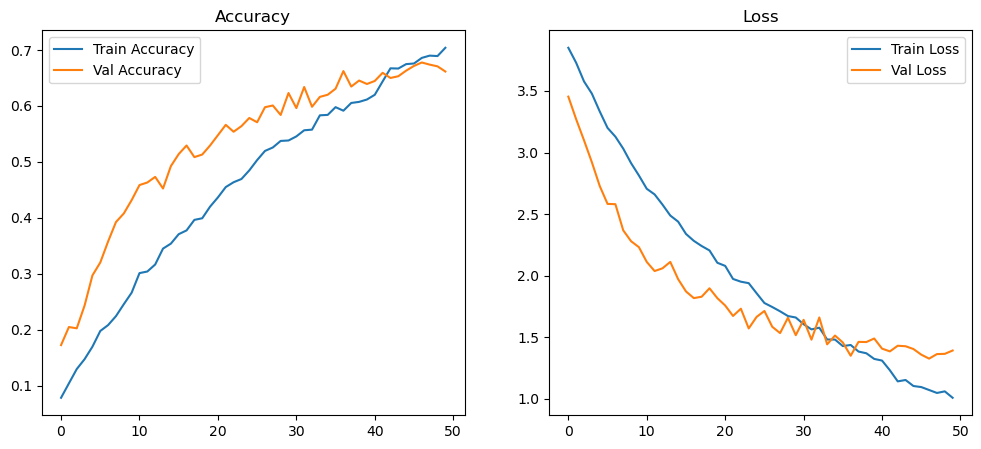

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [17]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6615 - loss: 1.3921
Validation Accuracy: 66.15%


In [18]:

model.save("model.h5")


import numpy as np
le_dict = {i: label for i, label in enumerate(le.classes_)}
np.save("le.npy", le_dict)
